## Projenin İçeriği
* **Proje Adı :** Computer Hardware
* **Proje İçeriği :** İşlemci markası, model adı, işlemci çevrim süresi, minimum ana bellek kapasitesi, maksimum ana bellek kapasitesi, önbellek boyutu, minimum kanal sayısı ve maksimum kanal sayısı özelliklerini kullanılarak yayınlanmış bağıl cpu performansı tespit edilmeye çalışılacaktır.

* **Not :** Veri setinde 10 adet özellik bulunmaktadır. 10. özelliğin (tahmin edilen bağıl cpu performansı) veri setinden çıkartılması istenmiştir bundan dolayı 10. özellik bu koda ve veri setine dahil edilmemiştir.
* Bu proje polinom regresyon kullanılarak yapılmıştır.
* Polinom regresyon doğrusal olmayan ilişkileri modeller.

### Gerekli kütüphanelerin eklenmesi

In [5]:
import numpy as np # diziler, matrisler ve sayısal değerler ile çalışır
import pandas as pd # büyük veri kümeleri için kullanılır
import matplotlib.pyplot as plt # veriyi görselleşitrmek için kullanılır
import statsmodels.api as sm # istatistiksel analiz ve modelleme sağlar.
from sklearn.linear_model import LinearRegression # çoklu doğrusal regresyon için kullanılır
from sklearn.model_selection import train_test_split # modeli test etmek için kullanılır
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures, LabelEncoder # veri setinin ölçeklendirme yapabilmesini sağlar
from sklearn.compose import ColumnTransformer # farklı sütunlar üzerinde farklı ön işleme işlemleri yapar
from sklearn.metrics import mean_squared_error, r2_score # hata oranını hesaplamak için kullanılır
import datetime

### Veri setinin yüklenmesi ve sütunların adlarının belirlenmesi
* **Vendor_Name :** İşlemci markası
* **Model_Name :** Model adı
* **MYCT :** İşlemci çevrim süresi
* **MMIN :** Minimum ana bellek kapasitesi
* **MMAX :** Maksimum ana bellek kapasitesi
* **CACH :** Önbellek boyutu
* **CHMIN :** Minimum kanal sayısı
* **CHMAX :** Maksimum kanal sayısı
* **PRP :** Bağıl CPU performansı

In [8]:
# Veri setini yükleme
sutun_adlari = ['Vendor_Name', 'Model_Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP']
data = pd.read_csv('C:/Users/Cansu/OneDrive/Masaüstü/machine-learning-project/machine.data', names=sutun_adlari)
data.shape
print(data.head())

# data dataframe'e aktarılmıştır
df = pd.DataFrame(data)

# Eksik veri kontrolü ve temizleme
print("\nEksik Değerler:\n", data.isnull().sum())
data = data.dropna()  # Eksik verileri kaldırma

  Vendor_Name Model_Name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP
0     adviser      32/60   125   256   6000   256     16    128  198
1      amdahl     470v/7    29  8000  32000    32      8     32  269
2      amdahl    470v/7a    29  8000  32000    32      8     32  220
3      amdahl    470v/7b    29  8000  32000    32      8     32  172
4      amdahl    470v/7c    29  8000  16000    32      8     16  132

Eksik Değerler:
 Vendor_Name    0
Model_Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
dtype: int64


### Bağımlı ve bağımsız değişkenlerin belirlenmesi
* Bağımsız değişkenler girdi (x) olarak adlandırılır.
* Bağımlı değişken ise çıktı (y) olarak adlandırılır.
  
### Sayısal veriye dönüşüm ve Ölçeklendirme 
* Kategorik türde (object) verileri sayısal verilere dönüştürmemiz gerekiyor çünkü bu bir regresyon modellemedir. Regresyon sayısal veriler ile çalışır.
* MinMaxScaler : 0-1 arasında ölçeklendirme yapılmasını sağlar. "fit_transform" ile model parametreleri eğitilir. "transform" ile de bu parametreler kullanılarak veriye dönüştürülür.

In [11]:
# Kategorik verileri One-Hot Encoding ile dönüştürme
data_encoded = pd.get_dummies(data, columns=['Vendor_Name', 'Model_Name'], drop_first=True)

# Bağımlı değişkeni ayırma
y = data_encoded['PRP']
X = data_encoded.drop('PRP', axis=1) # axis = 1 satır demektir. O satırı çıkartması gerektiğini söylüyoruz. Artık o satır hariç 
# diğer satırları x temsil etmektedir

# Min-Max Scaler ile bağımsız değişkenleri ölçeklendirme
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Min-Max Scaler ile bağımlı değişkeni ölçeklendirme
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Ölçeklendirilmiş verileri DataFrame olarak oluşturma
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
y_scaled_df = pd.DataFrame(y_scaled, columns=['PRP'])

# Kontrol: İlk 5 satırı yazdırma
print("Bağımsız Değişkenler (X):\n", X_scaled_df.head())
print("Bağımlı Değişken (y):\n", y_scaled_df.head())

Bağımsız Değişkenler (X):
        MYCT      MMIN      MMAX   CACH     CHMIN     CHMAX  \
0  0.072825  0.006012  0.092843  1.000  0.307692  0.727273   
1  0.008092  0.248497  0.499499  0.125  0.153846  0.181818   
2  0.008092  0.248497  0.499499  0.125  0.153846  0.181818   
3  0.008092  0.248497  0.499499  0.125  0.153846  0.181818   
4  0.008092  0.248497  0.249249  0.125  0.153846  0.090909   

   Vendor_Name_amdahl  Vendor_Name_apollo  Vendor_Name_basf  Vendor_Name_bti  \
0                 0.0                 0.0               0.0              0.0   
1                 1.0                 0.0               0.0              0.0   
2                 1.0                 0.0               0.0              0.0   
3                 1.0                 0.0               0.0              0.0   
4                 1.0                 0.0               0.0              0.0   

   ...  Model_Name_v8635  Model_Name_v8650  Model_Name_v8655  \
0  ...               0.0               0.0             

### Eğitim ve test verisi belirleme
* Veri setinde 209 tane örnek olduğu için %30 test oranı vermek istedim.

### Polinom regresyonu oluşturma
* polynomial_degree = 2 : Polinom regresyonu tanımlanır ve polinomun derecesi 2 verilir. Derece büyüdükçe daha karmaşıklaşır.
* Veri setinde hem sütun sayısı hem de satır sayısı fazla olduğu için ve karmaşıklık olmasın diye en iyi 10 özellik ile işlem yapmak istedim.

In [64]:
from sklearn.feature_selection import SelectKBest, f_regression
#SelectKBest, f_regression : Her bir özelliğin hedef değişkenle ilişkisi analiz edilmek için kullanılır.

# Önemli özellikleri seçme
selector = SelectKBest(score_func=f_regression, k=10)  # En iyi 10 özelliği seçiyoruz
X_reduced = selector.fit_transform(X_scaled, y)  # X_scaled yerine X kullanıyorsanız, burada değiştirebilirsiniz

# Polinom özellikler oluşturma
polynomial_degree = 2  # Polinom derecesi
poly_features = PolynomialFeatures(degree=polynomial_degree, interaction_only=True)
X_poly = poly_features.fit_transform(X_reduced)

### Veriyi eğitim ve test setlerine ayırma

209 veriye sahip olduğum için (orta büyüklükte eğitim seti) eğitim %70 test %30 verdim. Fakat elimdeki veri sayısı 1000 ve daha fazla olsaydı eğitim için daha fazla yüzdelik verirdim çünkü çok fazla veri var bunları eğitmesi gerekir.

* **X_train_poly :** Girdilerin polinom eğitim verileri
* **X_test_poly :** Girdilerin polinom test verileri
* **y_train :** Çıktının eğitim verisi
* **y_test :** Çıktının test verisi
* **test_size=0.2 :** Test için %20 kullanıldığını gösteriyor.

In [21]:
# Eğitim ve test setlerini bölme
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y_scaled, test_size=0.2, random_state=42)

### Polinom Regresyonun modelinin oluşturulması

In [23]:
# Doğrusal regresyon modeli oluşturma ve eğitme
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

### Matematiksel formülün oluşturulması

In [70]:
# Polinom özelliklerin isimlerini almak
ozellik_isimleri = poly_features.get_feature_names_out()

# Model katsayılarını ve sabit terimi al
katsayilar = poly_model.coef_
sabit_terim = poly_model.intercept_

# Eğer sabit_terim bir NumPy dizisiyse, ilk elemanı alın (çoklu çıktı durumları için)
if isinstance(sabit_terim, np.ndarray):
    sabit_terim = sabit_terim.item()  # Tek bir skalar değer alın

# Eğer katsayılar çok boyutluysa, ilk bağımlı değişkenin katsayılarını alın
if katsayilar.ndim > 1:
    katsayilar = katsayilar[0]  # İlk bağımlı değişkenin katsayılarını alın

# Polinom denklemi oluşturma
denklem = f"y = {sabit_terim:.4f}"  # Sabit terim
for katsayi, ozellik in zip(katsayilar, ozellik_isimleri):
    denklem += f" + ({katsayi:.4f}) * {ozellik}"

# Denklemi yazdırma
print("Polinom Regresyon Formülü:")
print(denklem)


Polinom Regresyon Formülü:
y = 17436467598838.2285 + (-17436467598838.2031) * 1 + (0.0100) * x0 + (0.3191) * x1 + (-0.0719) * x2 + (-0.1273) * x3 + (0.0994) * x4 + (0.0931) * x5 + (0.4281) * x6 + (0.0000) * x7 + (0.0592) * x8 + (-0.0000) * x9 + (-2.3125) * x0 x1 + (0.0869) * x0 x2 + (-1.2919) * x0 x3 + (-0.1380) * x0 x4 + (0.7027) * x0 x5 + (0.0148) * x0 x6 + (0.0000) * x0 x7 + (0.0005) * x0 x8 + (-0.0000) * x0 x9 + (0.5427) * x1 x2 + (-0.9274) * x1 x3 + (3.5258) * x1 x4 + (-2.8525) * x1 x5 + (-1.1719) * x1 x6 + (0.0000) * x1 x7 + (0.0147) * x1 x8 + (0.0000) * x1 x9 + (0.4251) * x2 x3 + (-0.1269) * x2 x4 + (0.9695) * x2 x5 + (0.3962) * x2 x6 + (0.0000) * x2 x7 + (0.0592) * x2 x8 + (0.0000) * x2 x9 + (0.6422) * x3 x4 + (0.6548) * x3 x5 + (-0.0112) * x3 x6 + (0.0000) * x3 x7 + (0.0296) * x3 x8 + (0.0000) * x3 x9 + (-1.5170) * x4 x5 + (-0.7192) * x4 x6 + (0.0000) * x4 x7 + (0.0137) * x4 x8 + (0.0000) * x4 x9 + (-1.0339) * x5 x6 + (0.0000) * x5 x7 + (0.0592) * x5 x8 + (0.0000) * x5 x9 + (0

### Tahminlerin yapılması
* Gerçek verilerle birlikte elimizde formülü kullanarak tahminler üreterek gerçek değerer karşılaştırırz ve doğruluğunu öğreniriz.

Eğitim Seti Tahminleri (Gerçek Ölçek):
[[ 222.734375]
 [ 412.65625 ]
 [1145.53125 ]
 [  55.15625 ]
 [ 629.390625]
 [  64.09375 ]
 [  41.75    ]
 [  50.6875  ]
 [  55.15625 ]
 [  30.578125]]
Eğitim Seti Gerçek Değerler:
[[ 214.]
 [ 465.]
 [1150.]
 [  32.]
 [ 510.]
 [  40.]
 [  24.]
 [  71.]
 [  23.]
 [  11.]]
Test Seti Tahminleri (Gerçek Ölçek):
[[102.078125]
 [ 41.75    ]
 [ 46.21875 ]
 [796.96875 ]
 [ 46.21875 ]
 [262.953125]
 [ 48.453125]
 [ 28.34375 ]
 [917.625   ]
 [166.875   ]]
Test Seti Gerçek Değerler:
[[ 274.]
 [  30.]
 [  22.]
 [ 915.]
 [  16.]
 [ 326.]
 [  72.]
 [   6.]
 [1144.]
 [ 208.]]


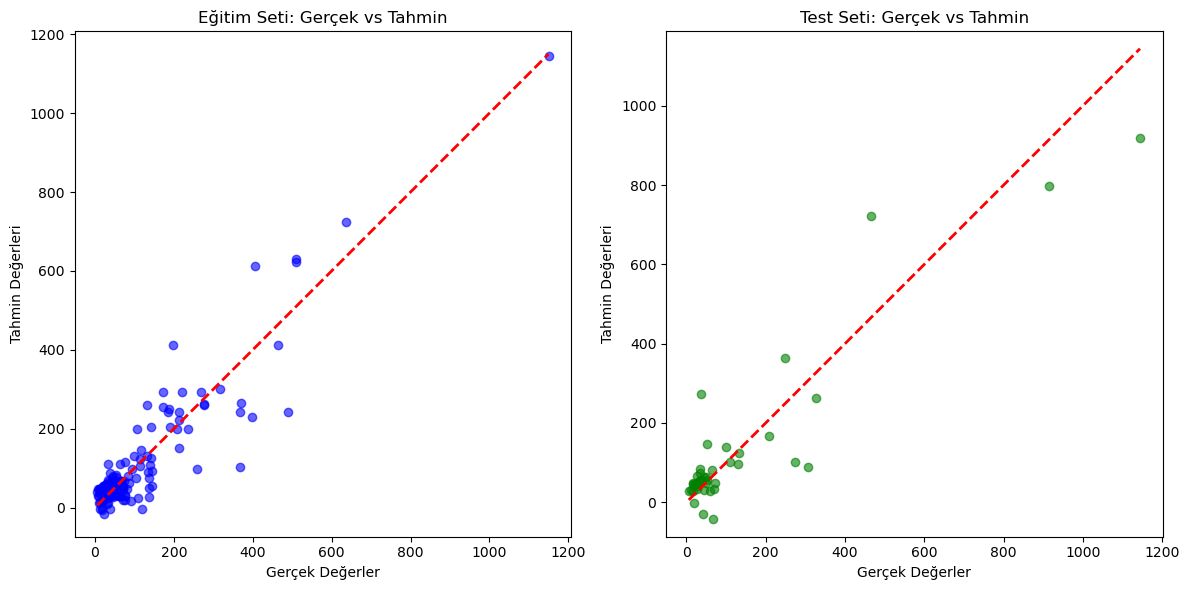

In [51]:
# Tahminler
E_Tahmin_Poly = poly_model.predict(X_train_poly)  # Eğitim seti tahminleri
T_Tahmin_Poly = poly_model.predict(X_test_poly)   # Test seti tahminleri

# Eğitim ve test seti için tahminler
y_train_pred = poly_model.predict(X_train_poly)  # Modelin eğitim seti üzerindeki tahminleri
y_test_pred = poly_model.predict(X_test_poly)    # Modelin test seti üzerindeki tahminleri


# Bağımlı değişkenin yeniden ölçeklendirilmesi için bağımlı scaler kullanımı
E_Tahmin_Poly_Gercek = scaler_y.inverse_transform(E_Tahmin_Poly.reshape(-1, 1))
T_Tahmin_Poly_Gercek = scaler_y.inverse_transform(T_Tahmin_Poly.reshape(-1, 1))

# Gerçek bağımlı değişken değerlerini yeniden ölçeklendirme
E_Gercek = scaler_y.inverse_transform(y_train.reshape(-1, 1))
T_Gercek = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Eğitim seti sonuçları
print("Eğitim Seti Tahminleri (Gerçek Ölçek):")
print(E_Tahmin_Poly_Gercek[:10])  # İlk 10 tahmini yazdırma
print("Eğitim Seti Gerçek Değerler:")
print(E_Gercek[:10])  # İlk 10 gerçek değeri yazdırma

# Test seti sonuçları
print("Test Seti Tahminleri (Gerçek Ölçek):")
print(T_Tahmin_Poly_Gercek[:10])  # İlk 10 tahmini yazdırma
print("Test Seti Gerçek Değerler:")
print(T_Gercek[:10])  # İlk 10 gerçek değeri yazdırma

# Tahmin ve gerçek değerleri karşılaştırma görselleştirmesi
# Görselleştirme: Eğitim ve test seti sonuçlarını karşılaştırma
plt.figure(figsize=(12, 6))

# Eğitim seti
plt.subplot(1, 2, 1)
plt.scatter(E_Gercek, E_Tahmin_Poly_Gercek, alpha=0.6, color="blue")
plt.plot([E_Gercek.min(), E_Gercek.max()], [E_Gercek.min(), E_Gercek.max()], 'r--', linewidth=2)
plt.title("Eğitim Seti: Gerçek vs Tahmin")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerleri")
plt.axis("equal")  # Eksen ölçeklerini eşit yap

# Test seti
plt.subplot(1, 2, 2)
plt.scatter(T_Gercek, T_Tahmin_Poly_Gercek, alpha=0.6, color="green")
plt.plot([T_Gercek.min(), T_Gercek.max()], [T_Gercek.min(), T_Gercek.max()], 'r--', linewidth=2)
plt.title("Test Seti: Gerçek vs Tahmin")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Değerleri")
plt.axis("equal")  # Eksen ölçeklerini eşit yap

plt.tight_layout()
plt.show()


### Performans değerlendirilmesi
* MSE (Mean Squared Error) ve R² (R-squared) gibi metrikler modelin performansını değerlendirir. 
* MSE 0'a R² 1'e ne kadar yakınsa o kadar iyidir.

In [53]:
# Model performansını değerlendirme (Eğitim ve test seti)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Eğitim Seti MSE: {train_mse:.4f}")
print(f"Eğitim Seti R2 Skoru: {train_r2:.4f}")
print(f"Test Seti MSE: {test_mse:.4f}")
print(f"Test Seti R2 Skoru: {test_r2:.4f}")

Eğitim Seti MSE: 0.0025
Eğitim Seti R2 Skoru: 0.8287
Test Seti MSE: 0.0059
Test Seti R2 Skoru: 0.8473


### Tahmin edilen değerler ile gerçek değerler arasındaki ilişkiyi görselleştirme
* plot_tahmin_vs_gercek : fonksiyon tanımı
* y_gercek : gerçek değer
* y_tahmin : tahmin değeri
* baslik : grafiğin başlığı
* plt.figure(figsize=(8, 6)) : garfiğin boyutu ayarlanır
* alpha=0.7 : noktaların şeffaflık düzeyi
* color='b' : noktaları mavi renk çizer
* label='Tahminler' : mavi ile gösterilen değer tahminler adını alır
* 'r--' : kırmızı kesik çizgiler çizer
* y : x doğrusu çizer

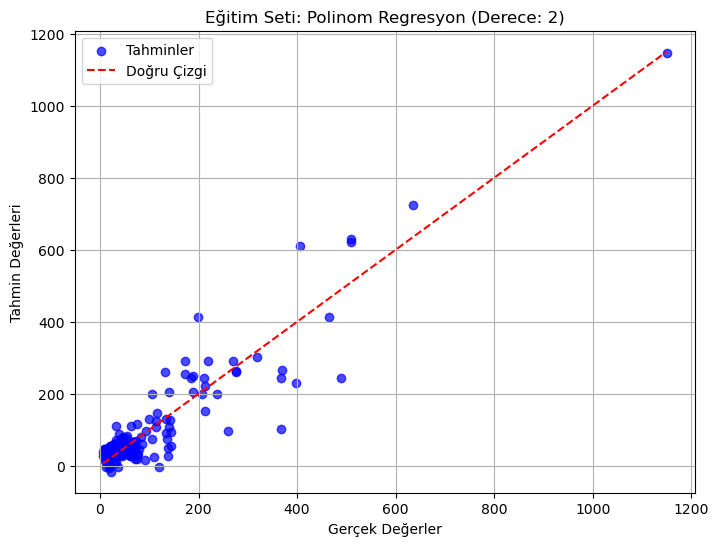

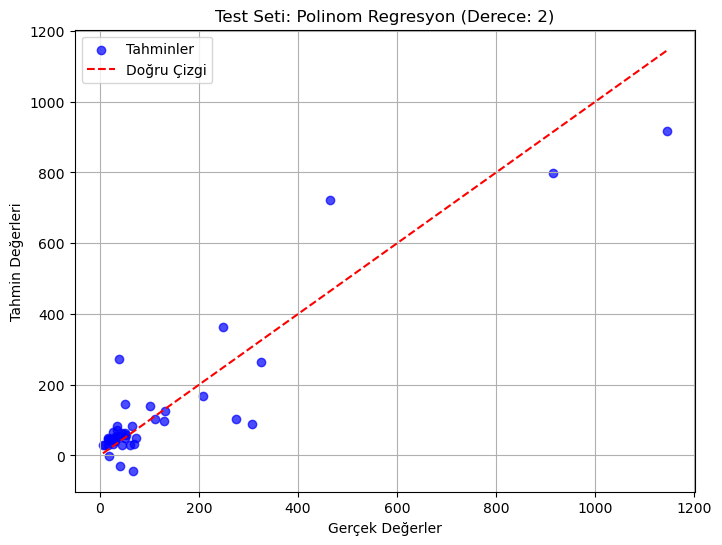

In [57]:

def plot_tahmin_vs_gercek(y_gercek, y_tahmin, baslik="Tahmin vs Gerçek"):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_gercek, y_tahmin, alpha=0.7, color='b', label='Tahminler')
    plt.plot(
        [y_gercek.min(), y_gercek.max()],
        [y_gercek.min(), y_gercek.max()],
        'r--',
        label='Doğru Çizgi'
    )
    plt.xlabel("Gerçek Değerler")
    plt.ylabel("Tahmin Değerleri")
    plt.title(baslik)
    plt.legend()
    plt.grid()
    plt.show()

plot_tahmin_vs_gercek(E_Gercek, E_Tahmin_Poly_Gercek, f"Eğitim Seti: Polinom Regresyon (Derece: {polynomial_degree})")
plot_tahmin_vs_gercek(T_Gercek, T_Tahmin_Poly_Gercek, f"Test Seti: Polinom Regresyon (Derece: {polynomial_degree})")


### Tahmin edilen değerler ile gerçek değerler arasındaki ilişkiyi çizgi grafiği ile görselleştirme

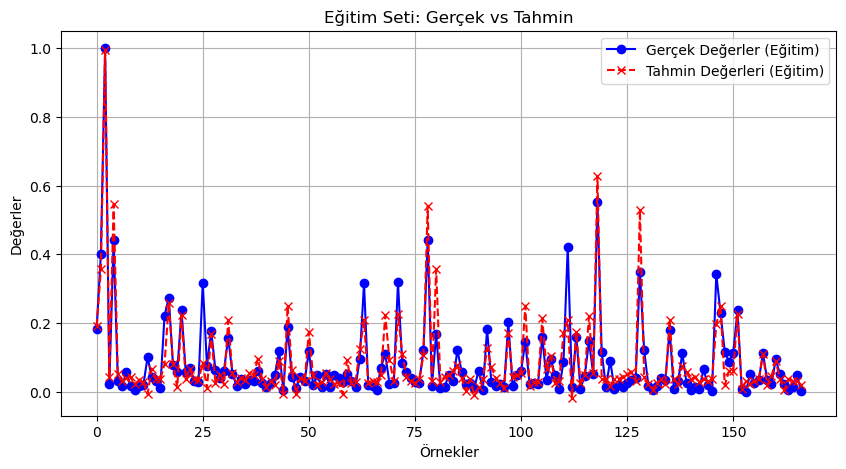

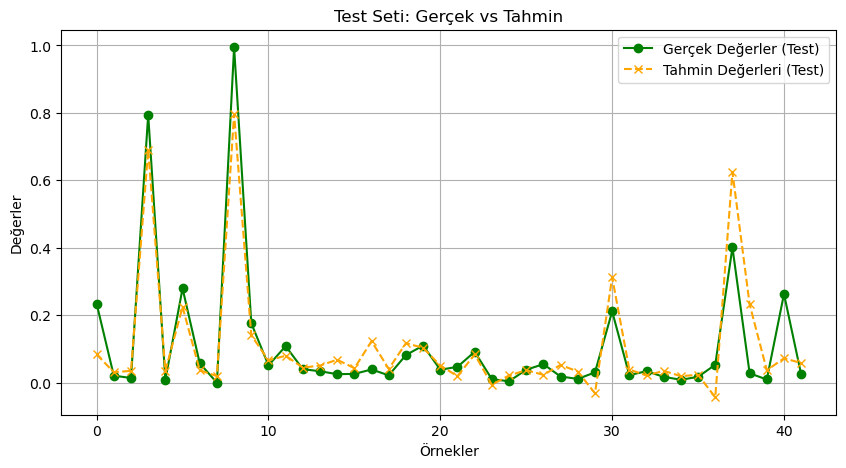

In [59]:
# Eğitim seti çizgi grafiği
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_train)), y_train, label='Gerçek Değerler (Eğitim)', color='blue', marker='o')
plt.plot(range(len(y_train_pred)), y_train_pred, label='Tahmin Değerleri (Eğitim)', color='red', linestyle='--', marker='x')
plt.title("Eğitim Seti: Gerçek vs Tahmin")
plt.xlabel("Örnekler")
plt.ylabel("Değerler")
plt.legend()
plt.grid()
plt.show()

# Test seti çizgi grafiği
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label='Gerçek Değerler (Test)', color='green', marker='o')
plt.plot(range(len(y_test_pred)), y_test_pred, label='Tahmin Değerleri (Test)', color='orange', linestyle='--', marker='x')
plt.title("Test Seti: Gerçek vs Tahmin")
plt.xlabel("Örnekler")
plt.ylabel("Değerler")
plt.legend()
plt.grid()
plt.show()
